# Random Forest vs XGBOOST-GooglePlayStore(EDA,Comparisons and Predictions)

# Imports


> 1. Let's get our environment ready with the libraries we'll need and then import the relevant ones beforehand!
> 2. Pandas is one of the most widely used python libraries in data science. It provides high-performance, easy to use structures and data analysis tools.
> 3. Matplotlib is a plotting library for the Python programming language
> 4. Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [5]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
import plotly_express as px
init_notebook_mode(connected=True)
%matplotlib inline

# Fetching the Data
> Using Pandas to load the dataset into this notebook. Using pandas we can read our datafile (googleplaystore.csv) with the line below. Data-set loaded will be assigned to the variable playst.

In [61]:
#load dataset and assign it to a variable
playst=pd.read_csv("googleplaystore.csv")

# Checking out the DataSet
> We will run some exploratory analysis on our playstore dataset to have an insight of the features.We would check for the shape of the dataset, any missing or null values and will try to find out the correlation amongst the dataset features.


In [62]:
# checking the first 10 rows of our play store apps dataframe
playst.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [63]:
# shape of the play store apps dataframe
playst.shape

(10841, 13)

In [64]:
# getting the insight of the type of feature columns and non-null values in the dataset
playst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [65]:
# Getting the insight of null values present in the feature columns
playst.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Data Cleaning

> Cleaning and fine-tuning our columns Installs,Price,Reviews and Size

In [66]:
#making a copy of our playst dataframe
playst_mb=playst.copy()

In [67]:
#function to convert size into Bytes by popping 'M' and 'K' from the string size values.
#converts to float data-type. 
def clean_size(x):
    if x.endswith('M'):
        x=float(x[:-1])*1000000
    elif x.endswith('k'):
        x=float(x[:-1])*1000
    else:
        x=np.nan
    return x

#function to convert size into MegaBytes
#converts to float data-type
def clean_size_mb(x):
    if x.endswith('M'):
        x=float(x[:-1])
    elif x.endswith('k'):
        x=float(x[:-1])/1000
    else:
        x=np.nan
    return x
    
#pop ',' from installs string and remove '+' from the end
#convert to float
def clean_install(x):
    if len(x)>1:
        x=x[:-1]
        x=x.replace(',','')
    x=float(x)
    return x

#pop '$' sign at the beginning and convert to float
def clean_price(x):
    if x.startswith('$'):
        return x[1:]
    else:
        return x

playst['Size']=playst['Size'].apply(clean_size)
playst['Size'].fillna(playst.groupby('Category')['Size'].transform('mean'),inplace = True)
playst=playst[playst['Size'].notna()]
#playst.head()

playst_mb['Size']=playst_mb['Size'].apply(clean_size_mb)
playst_mb['Size'].fillna(playst_mb.groupby('Category')['Size'].transform('mean'),inplace = True)
playst_mb=playst_mb[playst_mb['Size'].notna()]


playst['Installs']=playst['Installs'].apply(clean_install)
playst_mb['Installs']=playst_mb['Installs'].apply(clean_install)
#playst.info()

playst['Price']=playst['Price'].apply(clean_price).astype(float)
playst_mb['Price']=playst_mb['Price'].apply(clean_price).astype(float)

playst['Reviews']=playst['Reviews'].astype(float)
playst_mb['Reviews']=playst_mb['Reviews'].astype(float)
#playst.info()

playst=playst[playst['Rating'].notna()]
playst_mb=playst_mb[playst_mb['Rating'].notna()]

In [68]:
playst.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,9.366000e+03,9.366000e+03,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,2.235811e+07,1.789744e+07,0.960928
std,0.515219,3.144042e+06,2.165482e+07,9.123822e+07,15.816585
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,6.600000e+06,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,1.600000e+07,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,2.900000e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


# EDA,Comparisons and Projections

> Let's create some simple plots to check out the data and relations amongs the feature columns in the Play-Store-Apps dataset!

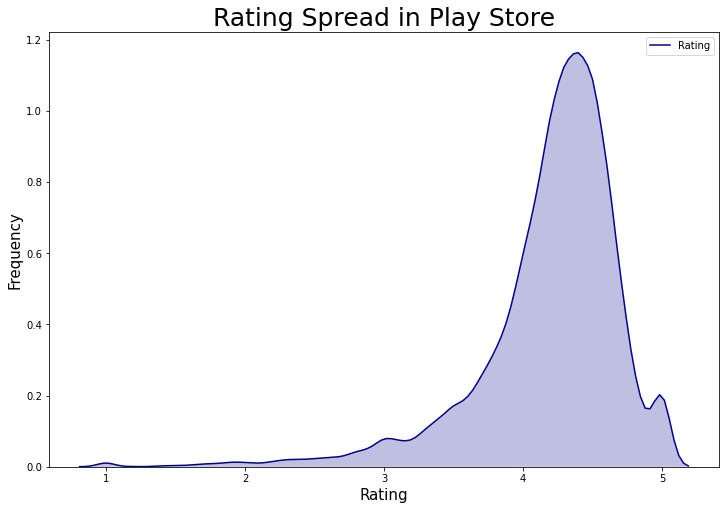

In [69]:
# rating distibution 
plt.figure(figsize=(12,8))
fig = sns.kdeplot(playst['Rating'], color="darkblue", shade = True)
fig.set_xlabel("Rating",size=15)
fig.set_ylabel("Frequency",size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Rating Spread in Play Store',size = 25)
plt.show()

- **More Applications tend to score a rating of 4.0+ on the play store. Most of the play store applications are found useful and engaing by its userbase.**
- **Average Rating is 4.19**

In [70]:
print('Avg. Size[MB]: ',playst_mb['Size'].mean())

Avg. Size[MB]:  22.35810526229544


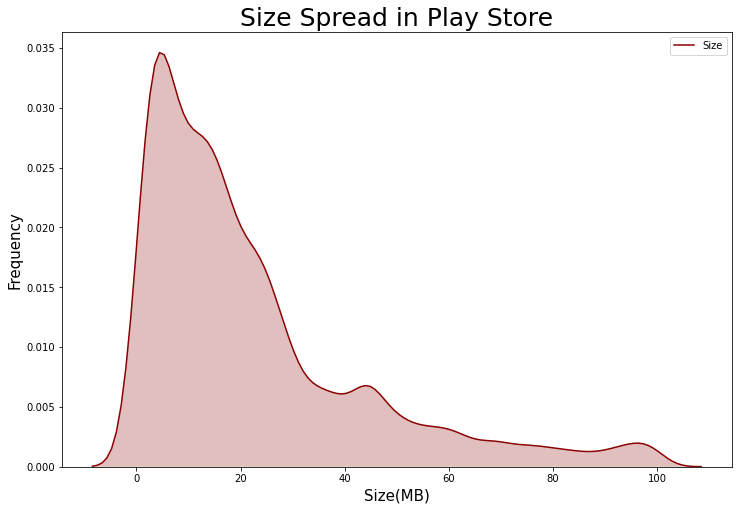

In [71]:
plt.figure(figsize=(12,8))
fig = sns.kdeplot(playst_mb['Size'], color="darkred", shade = True)
fig.set_xlabel("Size(MB)",size=15)
fig.set_ylabel("Frequency",size=15)
plt.title('Size Spread in Play Store',size = 25)
plt.show()

- **Average Size(MB) of applications in the play store is 22.35MB**

In [72]:
print('Avg.Reviews: ',playst['Reviews'].mean())

Avg.Reviews:  514049.8365364083


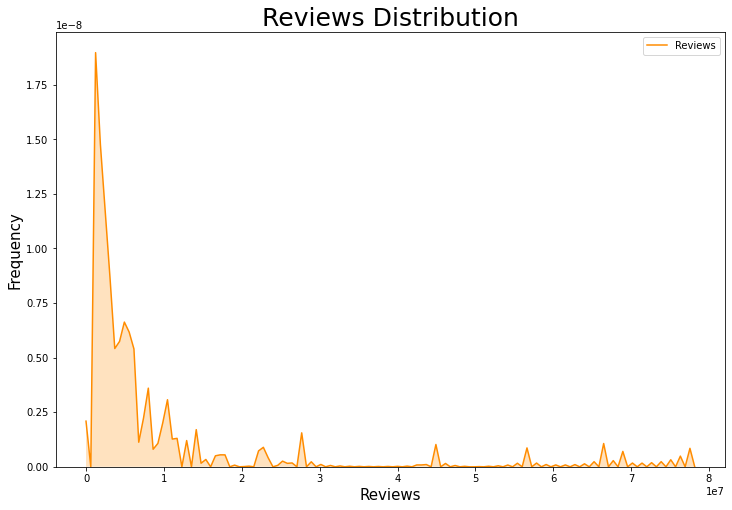

In [73]:
plt.figure(figsize=(12,8))
fig = sns.kdeplot(playst['Reviews'], color="darkorange", shade = True)
fig.set_xlabel("Reviews",size=15)
fig.set_ylabel("Frequency",size=15)
plt.title('Reviews Distribution',size = 25)
plt.show()

- **Avg # of Reviews seems to be 514049**

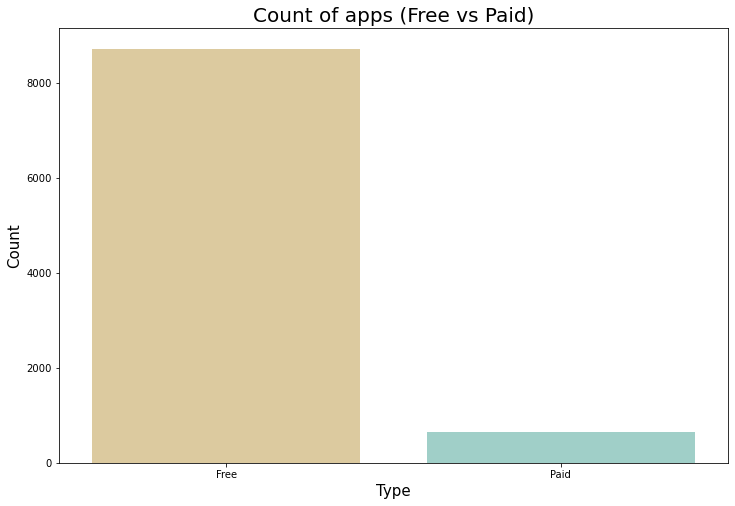

In [78]:
plt.figure(figsize=(12,8))
fig=sns.countplot(playst_mb['Type'],palette='BrBG')
fig.set_xlabel("Type",size=15)
fig.set_ylabel("Count",size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Count of apps (Free vs Paid)',size = 20)
plt.show()

#### Applications in the playstore are mostly free to use.

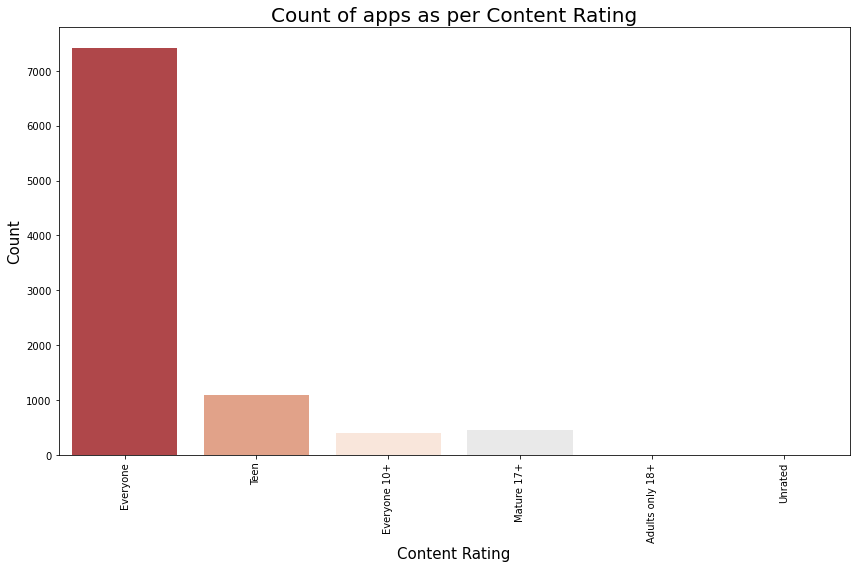

In [76]:
plt.figure(figsize=(12,8))
fig=sns.countplot(playst['Content Rating'],palette='RdGy')
fig.set_xlabel("Content Rating",size=15)
fig.set_ylabel("Count",size=15)
plt.xticks(size=10,rotation=90)
plt.yticks(size=10)
plt.title('Count of apps as per Content Rating',size = 20)
plt.tight_layout()

#### Applications on the playstore are mostly suitable for Everyone

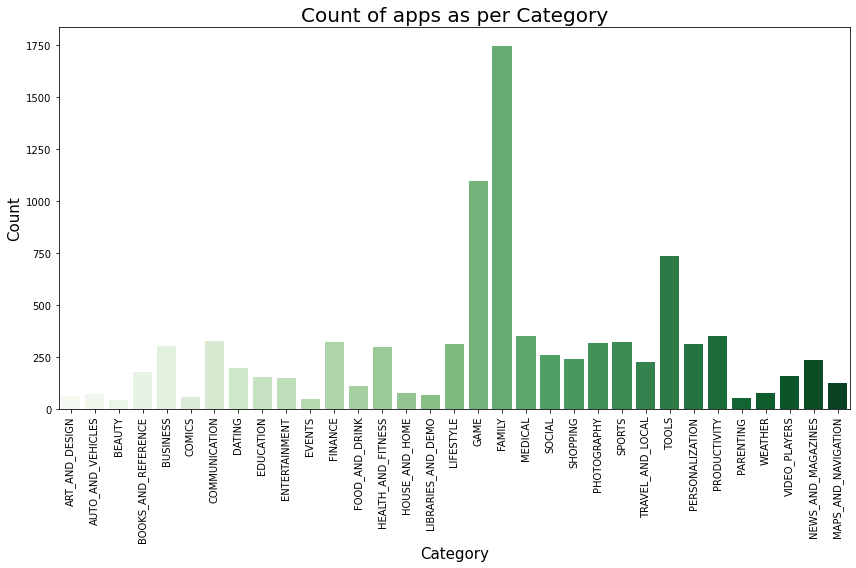

In [17]:
plt.figure(figsize=(12,8))
fig=sns.countplot(playst['Category'],palette='Greens')
fig.set_xlabel("Category",size=15)
fig.set_ylabel("Count",size=15)
plt.xticks(size=10,rotation=90)
plt.yticks(size=10)
plt.title('Count of apps as per Category',size = 20)
plt.tight_layout()

#### Game and Family Category Applications seems to be swarming all over the playstore !!

In [18]:
rat_catdf=playst.groupby('Category').describe().reset_index()
#rat_catdf.head()

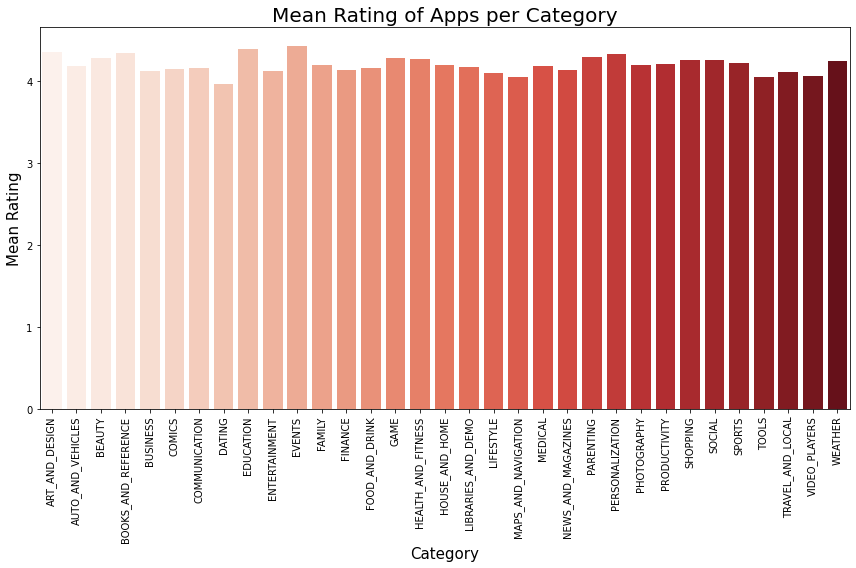

In [19]:
plt.figure(figsize=(12,8))
fig=sns.barplot(rat_catdf['Category'],rat_catdf['Rating']['mean'],palette='Reds')
fig.set_xlabel("Category",size=15)
fig.set_ylabel("Mean Rating",size=15)
plt.xticks(size=10,rotation=90)
plt.yticks(size=10)
plt.title('Mean Rating of Apps per Category',size = 20)
plt.tight_layout()

#### Average App 'Ratings' from different 'Categories' is more or less same!

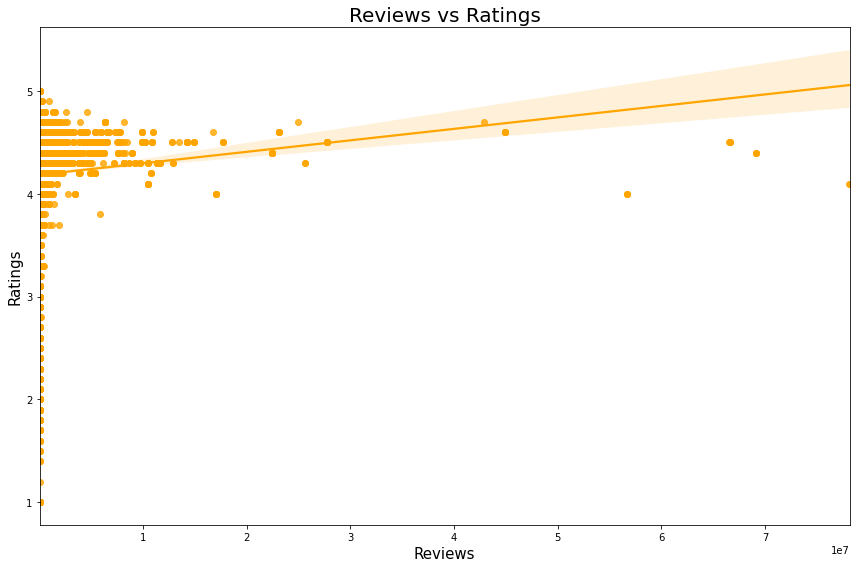

In [20]:
plt.figure(figsize=(12,8))
fig=sns.regplot(x='Reviews',y='Rating',data=playst,color='orange')
fig.set_xlabel("Reviews",size=15)
fig.set_ylabel("Ratings",size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Reviews vs Ratings',size = 20)
plt.tight_layout()

- **Most of the applications have reviews' count below 1000000 if we shun the outliers**
- **Apps scoring high on ratings generally have high Reviews**

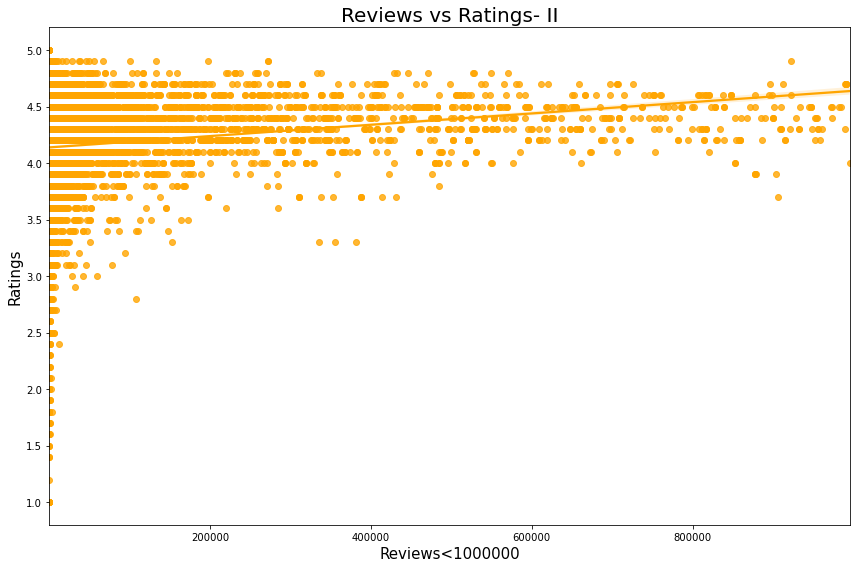

In [21]:
plt.figure(figsize=(12,8))
fig=sns.regplot(x='Reviews',y='Rating',data=playst[playst['Reviews']<1000000],color='orange')
fig.set_xlabel("Reviews<1000000",size=15)
fig.set_ylabel("Ratings",size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Reviews vs Ratings- II',size = 20)
plt.tight_layout()

#### More popular the app is more likely it is to be highly rated!

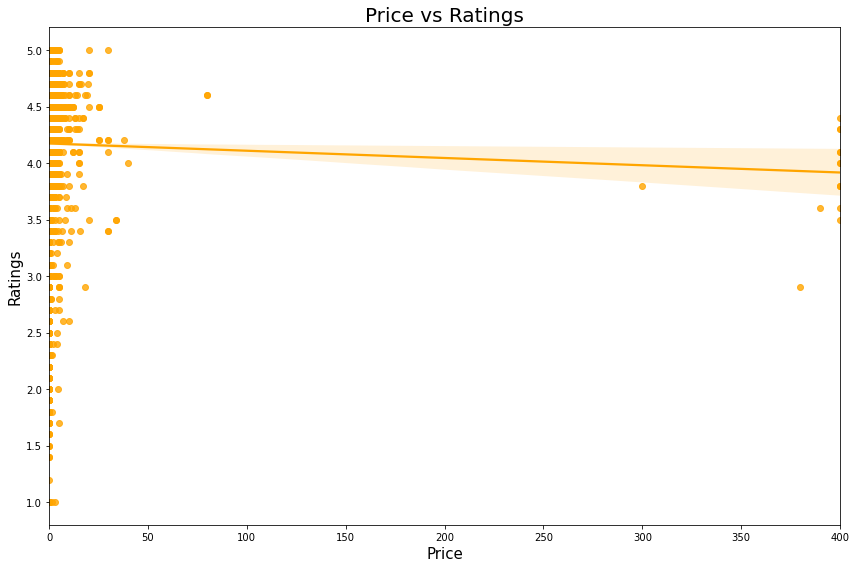

In [22]:
plt.figure(figsize=(12,8))
fig=sns.regplot(x='Price',y='Rating',data=playst[playst['Reviews']<1000000],color='orange')
fig.set_xlabel("Price",size=15)
fig.set_ylabel("Ratings",size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Price vs Ratings',size = 20)
plt.tight_layout()


#### High Priced Apps suffer on ratings if they don't perform as they claim

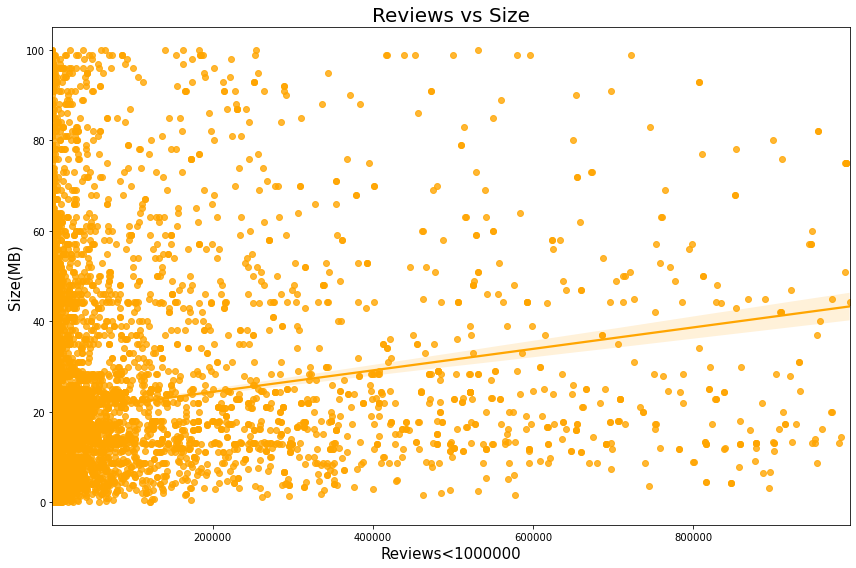

In [23]:
plt.figure(figsize=(12,8))
fig=sns.regplot(x='Reviews',y='Size',data=playst_mb[playst_mb['Reviews']<1000000],color='orange')
fig.set_ylabel("Size(MB)",size=15)
fig.set_xlabel("Reviews<1000000",size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Reviews vs Size',size = 20)
plt.tight_layout()


#### Lighter Apps seems to be more popular than heavier ones!

<Figure size 1080x864 with 0 Axes>

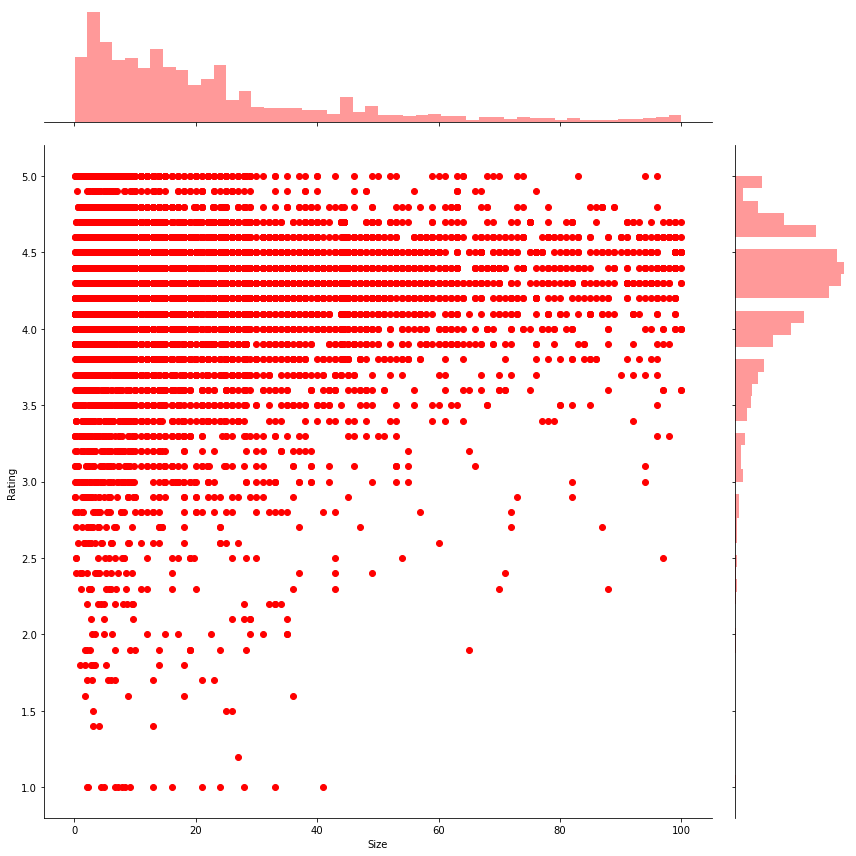

In [24]:
plt.figure(figsize=(15,12))
fig=sns.jointplot(x='Size',y='Rating',data=playst_mb,color='red',size=12)
plt.show()

# Feature Engineering

> Performing one-hot encoding on Categorical Columns Type and Content-Rating besides dropping columns which don't contribute to regression models !

In [25]:
# Dropping columns that do not contribute numerically to the Regression Model
playst.drop(columns=['Current Ver','Android Ver','App','Last Updated'],inplace=True)
#playst.isnull().sum()

In [26]:
#encoding categorical values
playst=pd.get_dummies(playst,columns=['Type','Content Rating'],drop_first=True)
#playst.head()

In [27]:
# Splitting our mathematical feature columns and assigning it to 'X'
X=playst.drop(columns=['Category','Rating','Genres'],axis=1)

#Splitting our target variable 'Rating' and assigning it to 'y'
y=playst['Rating']

# Splitting/Scaling our train/test Data

In [28]:
# We're splitting up our data set into groups called 'train' and 'test'
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()


#scaling the training data(fitting the parameters and transforming the values)
X_train=scaler.fit_transform(X_train)

#transforming the test data.We avoid fitting the values to prevent data leakage!
X_test=scaler.transform(X_test)


# Tuning and Training our Model

> ## XGBOOST Regressor

> >### XGB Core Imports

In [30]:
# Import xgboost ensemble model
import xgboost

#core import for hyperparamter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

> >### Basic Model Fitting and Predictions

In [31]:
#creates a xgbRegressor object
regressor_xgb=xgboost.XGBRegressor()

#fitting without hyperparamter tuning
regressor_xgb.fit(X_train,y_train)

#predictions
pred_xgb=regressor_xgb.predict(X_test)

> >### XGB Hyperparameter tuning

In [32]:
#Hyperparamter_Tuning_xgb
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
parameter_grid_xgb = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [33]:
# Set up the random search with 5-fold cross validation
regressor=xgboost.XGBRegressor()

random_cv_xgb = RandomizedSearchCV(estimator=regressor,
            param_distributions=parameter_grid_xgb,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 3,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

#train on the RandomSearchCv object to get best estimators
random_cv_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   12.6s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  1.6min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  2.9min
[Parallel(n_jobs=3)]: Done 250 out of 250 | elapsed:  4.2min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=3,
                   para

In [34]:
#getting the best estimators
random_cv_xgb.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
#getting the best params
random_cv_xgb.best_params_

{'n_estimators': 100,
 'min_child_weight': 2,
 'max_depth': 5,
 'learning_rate': 0.15,
 'booster': 'gbtree',
 'base_score': 1}

In [36]:
# reinitializing the regressor object with the best probable estimators
regressor_xgb=xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=np.nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

> >### XGB Model Training

In [37]:
# fitting the xgbRegressor on our training data
regressor_xgb.fit(X_train,y_train)

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

>>### XGBRegressor() Predictions

In [38]:
# fetching the predictions on our test data
predictions_xgb=regressor_xgb.predict(X_test)

> ## Random Forest Regressor

> >### Random Forest Imports

In [39]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees

> >### Basic Model Fitting and Predictions

In [40]:
rf=RandomForestRegressor(n_estimators = 10, random_state = 42)

#fitting without hyperparamter tuning
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [41]:
#predictions
pred_rf=rf.predict(X_test)

> >### Random Forest Hyperparamter Tuning

In [42]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [43]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs =-1,scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 20.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [44]:
#getting the best params
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [45]:
#getting the best estimators
rf_random.best_estimator_

RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [46]:
rf=RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800,bootstrap=True)

>>### RF Model Training

In [47]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

>>### RF Regressor Predictions

In [48]:
# Use the forest's predict method on the test data
predictions_rf = rf.predict(X_test)

# Perfomance Evaluation: XGBOOST vs Random Forest

We shall evaluate and compare the perfomance of XGBOOST Regressor and Random Forest Regressor against each other.
Metrics involved are-
> 1. MAS
> 2. MSE
> 3. RMSE
> 4. Accuracy

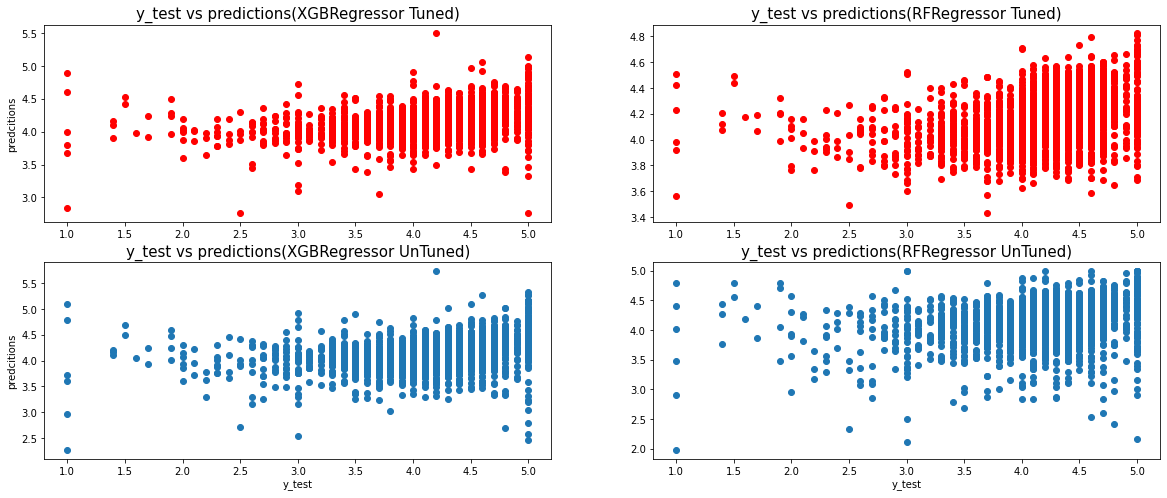

In [49]:
fig,ax = plt.subplots(2,2,figsize=(20,8))
# Plot-label
ax[0][0].set_title('y_test vs predictions(XGBRegressor Tuned)',size=15)
# Y-label
ax[0][0].set_ylabel('predcitions',size=10)
ax[0][0].scatter(y_test,predictions_xgb,color='red')

# Plot-label
ax[0][1].set_title('y_test vs predictions(RFRegressor Tuned)',size=15)
ax[0][1].scatter(y_test,predictions_rf,color='red')

ax[1][0].set_title('y_test vs predictions(XGBRegressor UnTuned)',size=15)
# Y-label
ax[1][0].set_ylabel('predcitions',size=10)
#X-label
ax[1][0].set_xlabel('y_test',size=10)

ax[1][0].scatter(y_test,pred_xgb)

# Plot-label
ax[1][1].set_title('y_test vs predictions(RFRegressor UnTuned)',size=15)
#X-label
ax[1][1].set_xlabel('y_test',size=10)

ax[1][1].scatter(y_test,pred_rf)

**The line of best fit would clearly fit our Tuned Models better than the Untuned Models.**

Text(0.5, 1.0, 'Residual Analysis RF(UnTuned)')

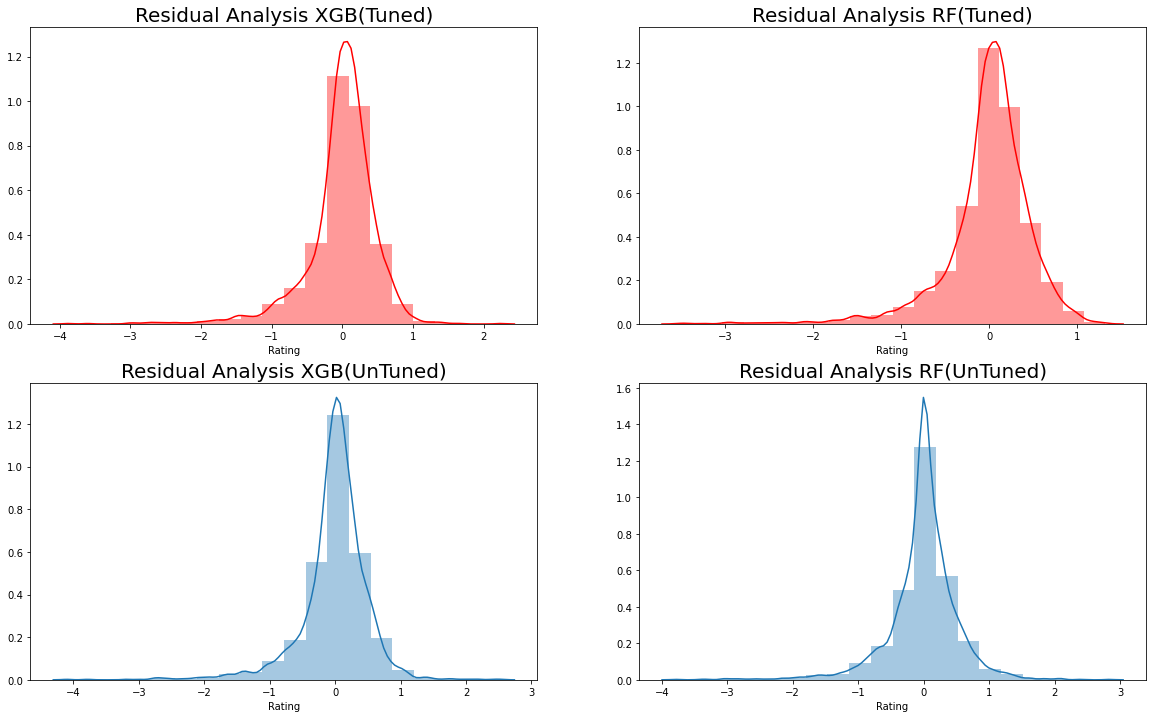

In [50]:
fig,ax=plt.subplots(2,2,figsize=(20,12))
  
sns.distplot((y_test-predictions_xgb),bins=20,ax=ax[0][0],color='red')

#Plot Label
ax[0][0].set_title('Residual Analysis XGB(Tuned)', fontsize = 20)

sns.distplot((y_test-predictions_rf),bins=20,ax=ax[0][1],color='red')

#Plot Label
ax[0][1].set_title('Residual Analysis RF(Tuned)', fontsize = 20)

sns.distplot((y_test-pred_xgb),bins=20,ax=ax[1][0])

#Plot Label
ax[1][0].set_title('Residual Analysis XGB(UnTuned)', fontsize = 20)

sns.distplot((y_test-pred_rf),bins=20,ax=ax[1][1])

#Plot Label
ax[1][1].set_title('Residual Analysis RF(UnTuned)', fontsize = 20)



### XGB(Tuned) vs RF(Tuned) Error Evaluations

In [51]:
print('Mean Absolute Error\tMAE_XGB:', metrics.mean_absolute_error(y_test, predictions_xgb),'\t\t MAE_RF:',  metrics.mean_absolute_error(y_test, predictions_rf))
print('Mean Squared Error\tMSE_XGB:', metrics.mean_squared_error(y_test, predictions_xgb),'\t\t MSE_RF:',  metrics.mean_squared_error(y_test, predictions_rf))
print('Root Mean Squared Error\tRMSE_XGB:', np.sqrt(metrics.mean_squared_error(y_test, predictions_xgb)),'\t\t RMSE_RF:', np.sqrt(metrics.mean_squared_error(y_test, predictions_rf)))

Mean Absolute Error	MAE_XGB: 0.3286352604054895 		 MAE_RF: 0.3290321618221097
Mean Squared Error	MSE_XGB: 0.24150508494707557 		 MSE_RF: 0.24223047503593254
Root Mean Squared Error	RMSE_XGB: 0.49143166864486415 		 RMSE_RF: 0.49216915286914575


### XGB(UnTuned) vs RF(UnTuned) Error Evaluations

In [52]:
print('Mean Absolute Error\tMAE_XGB:', metrics.mean_absolute_error(y_test, pred_xgb),'\t\t MAE_RF:',  metrics.mean_absolute_error(y_test, pred_rf))
print('Mean Squared Error\tMSE_XGB:', metrics.mean_squared_error(y_test, pred_xgb),'\t\t MSE_RF:',  metrics.mean_squared_error(y_test, pred_rf))
print('Root Mean Squared Error\tRMSE_XGB:', np.sqrt(metrics.mean_squared_error(y_test, pred_xgb)),'\t\t RMSE_RF:', np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))

Mean Absolute Error	MAE_XGB: 0.33542639810419594 		 MAE_RF: 0.3429081765802407
Mean Squared Error	MSE_XGB: 0.26027986778032836 		 MSE_RF: 0.2807337772591006
Root Mean Squared Error	RMSE_XGB: 0.5101763104852364 		 RMSE_RF: 0.5298431628879442


> ### 1. XGB Model performs more or less the same even after tuning the hyperparameters
> ### 2. We see a slight improvement in the Random Forest Regressor with hyperparameters tuning

## Accuracy: XGBOOST vs RandomForest [Tuned]

In [53]:
# Calculate the absolute errors
errors_xgb = abs(predictions_xgb - y_test)
mape_xgb = 100 * (errors_xgb / y_test)
# Calculate and display accuracy
accuracy_xgb = 100 - np.mean(mape_xgb)

errors_rf = abs(predictions_rf - y_test)
mape_rf = 100 * (errors_rf / y_test)
# Calculate and display accuracy
accuracy_rf = 100 - np.mean(mape_rf)

print('Accuracy_XGBoost:', round(accuracy_xgb, 2), '%.\t\t\tAccuracy_RandomForest:', round(accuracy_rf, 2), '%.')


Accuracy_XGBoost: 90.52 %.			Accuracy_RandomForest: 90.47 %.


## Accuracy: XGBOOST vs RandomForest [UnTuned]

In [54]:
# Calculate the absolute errors
errors_xgb = abs(pred_xgb - y_test)
mape_xgb = 100 * (errors_xgb / y_test)
# Calculate and display accuracy
accuracy_xgb = 100 - np.mean(mape_xgb)

errors_rf = abs(pred_rf - y_test)
mape_rf = 100 * (errors_rf / y_test)
# Calculate and display accuracy
accuracy_rf = 100 - np.mean(mape_rf)

print('Accuracy_XGBoost:', round(accuracy_xgb, 2), '%.\t\t\tAccuracy_RandomForest:', round(accuracy_rf, 2), '%.')


Accuracy_XGBoost: 90.39 %.			Accuracy_RandomForest: 90.25 %.


# Conclusion

## 1. MODEL

- **For both Random Forest and XGBOOST Regressor, perfomance is comparable**
- **Tuned Models performs expectedly better than their untuned versions**
- **Tuned XGBOOST edges Tuned Random Forest by 0.05% performing better in accuracy**
- **XGBOOST performs better overall on every Error metric compared to Random Forest Regressor**

## 2. PlayStore Predictions

- Play Store is flodded with Apps that are mostly free to use
- Store has a high number of apps from **Family and Game Category**
- Avg Number Reviews on an app is below **1000000**
- Average size of an app on the play store is **22MB**
- Average price of a play store app is **0.96** with Highest being **400** in dollars
- **Lighter Applications** are more popular and highly rated
- Apps with **high Price** suffer from **low ratings** more readily
- Apps with **good ratings** have **more** number of user reviews